# Research on apartment sales ads

You will have the data from a real estate agency. It is an archive of sales ads for realty in St. Petersburg, Russia, and the surrounding areas collected over the past few years. You’ll need to learn how to determine the market value of real estate properties. Your task is to define the parameters. This will make it possible to build an automated system that is capable of detecting anomalies and fraudulent activity.

There are two different types of data available for every apartment for sale. The first type is a user’s input. The second type is received automatically based upon the map data. For example, the distance from the city center, airport, the nearest park or body of water. 

### Step 1. Open the data file and study the general information. 

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sn
from nltk.stem import SnowballStemmer 
import nltk
from nltk.stem import WordNetLemmatizer

In [12]:
data = pd.read_csv('/datasets/real_estate_data_us.csv', sep="\t") #read data file
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07T00:00:00,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04T00:00:00,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,NaN,False,False,Shushary village,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20T00:00:00,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,NaN,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24T00:00:00,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,NaN,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19T00:00:00,121.0,200000.0,2,41.0,32.0,100.0,NaN,3.03,14.0,...,NaN,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0


In [13]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null object
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            12180 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         2775 non-null object
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     18180 non-null float64
park_dist            8079 non-null float64
parks_within_3000    18181 non-null float64
pond_dist            9110 no

In [14]:
data.shape

(23699, 22)

In [15]:
data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,total_images,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,12180.000000,14504.000000,23613.000000,23699.000000,23699.000000,18157.000000,18180.000000,8079.000000,18181.000000,9110.000000,18181.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,1.150082,2.771499,10.673824,5.892358,9.858475,28793.672193,14191.277833,490.804555,0.611408,517.980900,0.770255
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,1.071300,1.261056,6.597173,4.885249,5.682529,12630.880622,8608.386210,342.317995,0.802074,277.720643,0.938346
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,181.000000,1.000000,0.000000,13.000000,0.000000
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,6.000000,18585.000000,9238.000000,288.000000,0.000000,294.000000,0.000000
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,1.000000,2.650000,9.000000,4.000000,9.000000,26726.000000,13098.500000,455.000000,0.000000,502.000000,1.000000
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,2.000000,2.800000,16.000000,8.000000,14.000000,37273.000000,16293.000000,612.000000,1.000000,729.000000,1.000000
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,50.000000,84869.000000,65968.000000,3190.000000,3.000000,1344.000000,3.000000


### Conclusion

We have a huge table with lots of data, that varies both in accuracy and in quality of data itself. There's a lot of job to be done both in data preposessing and in folowing it data analysis.

### Step 2. Data preprocessing

In [16]:
#For data prepocessing I'm gonna go left to right.

#First step is to convert date_posted column to date format
data['date_posted'] = pd.to_datetime(data['date_posted'], format='%Y-%m-%d %H:%M:%S').dt.round('1D')

data.date_posted.value_counts()

2018-02-01    368
2017-11-10    240
2017-10-13    124
2017-09-27    111
2018-03-26     97
             ... 
2015-02-03      1
2016-10-28      1
2015-05-17      1
2016-01-06      1
2015-09-02      1
Name: date_posted, Length: 1491, dtype: int64

In [17]:
#For second column there is no problem with format, but there is a need to check what's going on with empty values
data[data['days_listed'].isna()].head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,NaN,260000.0,3,25.0,51.0,108.0,NaN,2.70,16.0,...,NaN,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
7,2019-04-18,NaN,158300.0,2,18.9,NaN,71.6,2.0,NaN,24.0,...,NaN,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
44,2018-11-18,NaN,107000.0,1,NaN,NaN,40.0,1.0,NaN,22.0,...,NaN,False,False,Saint Petersburg,30471.0,11603.0,620.0,1.0,1152.0,1.0
45,2018-12-02,NaN,104000.0,2,7.0,30.3,50.6,NaN,2.65,9.0,...,NaN,False,False,Saint Petersburg,30011.0,12872.0,NaN,0.0,NaN,0.0
46,2019-01-31,NaN,132000.0,2,8.3,29.7,52.1,2.0,2.60,24.0,...,NaN,False,False,Saint Petersburg,15114.0,12702.0,NaN,0.0,NaN,0.0


In [18]:
print ('Days listed is an empty value:', data[data['days_listed'].isna()].shape[0])
print ('Days listed is not an empty value:',data[data['days_listed'].isna()==False].shape[0])

Days listed is an empty value: 3181
Days listed is not an empty value: 20518


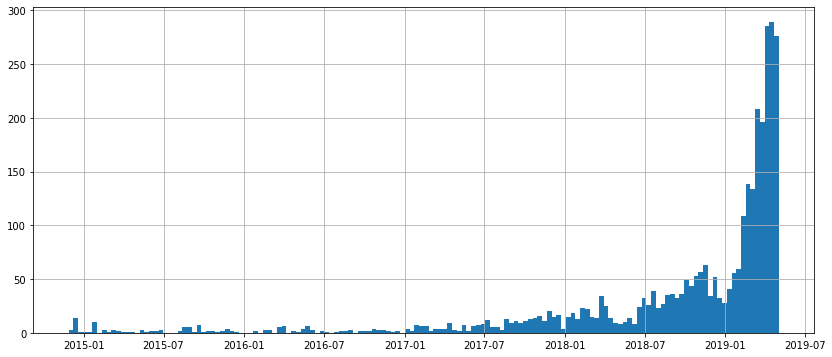

In [19]:
#I have an assumption that the values that have empty days listed values are still on the market
#let's try to check that.
data_on_market = data[data['days_listed'].isna()].copy() #create a separate list for these values
data_on_market.date_posted.hist(bins=150, figsize=(14,6)); #create a histogram for date_posted value
                                                            #for rows, that have empty days_listed


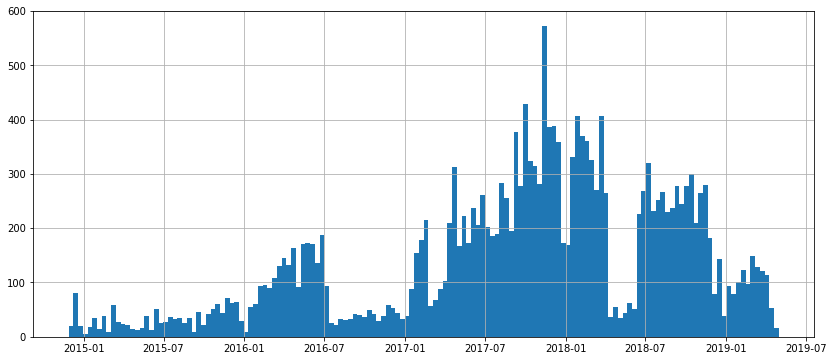

In [20]:
#histogram of all the days posted but the values that have empty days_listed.
data[data['days_listed'].isna()==False].date_posted.hist(bins=150, figsize=(14,6))

As we can see we have completely different distribution on values here. The rows that have empty value of days_listed are mostly publicated in last several months of the analysis, that probably means that these adds are still on the market. So there are two things that we can do here:
* Change the values for days listed to the last date of the analysis;
* Leave them like this, but have in mind that these rows were still on the market by the day of collection of data.

I'm gonna choose the second option here, because changing this data may affect later analysis.

In [21]:
#No emplty values or problems with the format in columns last_price and bedrooms

#There are empty values in columns kitchen_area and living_area, 
#but I don't see if there was something to do with it right now, I hope we deal with it later

#For balconies obvious solution is to change NaN values to 0, because even if there were any, we'll never find out
#and we'll base our decisitons on a fact that there weren't any.
#print (data[data['balconies'].isna()].shape)
data['balconies'] = data['balconies'].fillna(value=0)
data.balconies.value_counts()

0.0    15277
1.0     4195
2.0     3659
5.0      304
4.0      183
3.0       81
Name: balconies, dtype: int64

In [22]:
#Also nothing to do with ceiling_height

#Check missing values in floors_total
data[data['floors_total'].isna()].shape

(86, 22)

In [23]:
data[data['floors_total'].isna()].head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
186,2018-10-02,49.0,232800.0,2,12.00,30.80,65.2,0.0,NaN,NaN,...,NaN,False,False,Saint Petersburg,39197.0,12373.0,123.0,1.0,NaN,0.0
237,2016-11-23,251.0,48761.0,1,NaN,20.75,28.1,0.0,NaN,NaN,...,NaN,False,False,Saint Petersburg,22041.0,17369.0,NaN,0.0,374.0,1.0
457,2015-08-01,727.0,195767.0,2,10.63,38.40,70.8,0.0,NaN,NaN,...,NaN,False,False,Saint Petersburg,37364.0,8322.0,309.0,2.0,706.0,2.0
671,2017-04-06,123.0,121024.0,3,16.80,47.10,93.6,0.0,NaN,NaN,...,NaN,False,False,Saint Petersburg,22041.0,17369.0,NaN,0.0,374.0,1.0
1757,2017-04-22,77.0,72000.0,1,NaN,NaN,39.0,0.0,NaN,NaN,...,NaN,False,False,Saint Petersburg,22735.0,11618.0,835.0,1.0,652.0,1.0


Don't see any solution here, so we'll leave this data empty for now.

In [24]:
#Let's have a look at what's going on with bike_parking
data.bike_parking.value_counts()

False    2725
True       50
Name: bike_parking, dtype: int64

In [25]:
#So here should be a bool value, but some of values are empty, so we'll fill them with False
data.bike_parking = data.bike_parking.fillna(value=False)

data.bike_parking.value_counts()

False    23649
True        50
Name: bike_parking, dtype: int64

In [26]:
data.locality_name.value_counts().head(50)

Saint Petersburg             15721
Murino village                 556
Shushary village               440
Vsevolozhsk                    398
Pushkin                        369
Kolpino                        338
Pargolovo village              327
Gatchina                       307
Kudrovo village                299
Vyborg                         237
Petergof                       201
Sestroretsk                    183
Krasnoye Selo                  178
Kudrovo                        173
Novoye Devyatkino village      144
Sertolovo                      142
Lomonosov                      133
Kirishi                        125
Bugry village                  114
Slantsy                        112
Volkhov                        111
Tosno                          104
Kingisepp                      104
Kronshtadt                      96
Nikolskoye                      93
Kommunar                        89
Sosnovy Bor                     87
Kirovsk                         84
Otradnoye           

In [27]:
#Our next step is to check what is going on with empty names of the locations
data[data.locality_name.isna()].shape


(49, 22)

In [28]:
#We will keep this 22 rows, they can be useful later. Now let's clear localities names.
#There are some dublicated locations, like Murino Village and Murino, so for that to be gone,
#we'll delete all 'Village'
def locality_name_clearer(row):
    full_name = str(row).split()
    word_counter = 0
    x = str()
    for word in full_name:
        word_counter +=1
        if word !='village' and word !='Village':
            if word_counter > 1:
                x = x + ' ' + word
            else: x = word    
        else: x = x
    if x == 'nan':
        return None
    else: return x


data['locality_name'] = data['locality_name'].apply(locality_name_clearer)
data.locality_name.value_counts()

Saint Petersburg    15721
Murino                590
Kudrovo               472
Shushary              440
Vsevolozhsk           398
                    ...  
 Petro-Slavyanka        1
Kurovitsy               1
Novaya Ropsha           1
Dzerzhinskogo           1
Kalozhitsy              1
Name: locality_name, Length: 322, dtype: int64

In [29]:
#let's check city center distances for them.
data[data.locality_name.isna()].city_center_dist.describe()

count       41.000000
mean     11278.902439
std       8910.058254
min       1322.000000
25%       4383.000000
50%       8943.000000
75%      17369.000000
max      41294.000000
Name: city_center_dist, dtype: float64

City center distances vary a lot, so we are going to fill them depening on the location they are at.

In [30]:
data.head(10)

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,bike_parking,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000
0,2019-03-07,NaN,260000.0,3,25.00,51.00,108.00,0.0,2.70,16.0,...,False,False,False,Saint Petersburg,18863.0,16028.0,482.0,1.0,755.0,2.0
1,2018-12-04,81.0,67000.0,1,11.00,18.60,40.40,2.0,NaN,11.0,...,False,False,False,Shushary,12817.0,18603.0,NaN,0.0,NaN,0.0
2,2015-08-20,558.0,103920.0,2,8.30,34.30,56.00,0.0,NaN,5.0,...,False,False,False,Saint Petersburg,21741.0,13933.0,90.0,1.0,574.0,2.0
3,2015-07-24,424.0,1298000.0,3,NaN,NaN,159.00,0.0,NaN,14.0,...,False,False,False,Saint Petersburg,28098.0,6800.0,84.0,2.0,234.0,3.0
4,2018-06-19,121.0,200000.0,2,41.00,32.00,100.00,0.0,3.03,14.0,...,False,False,False,Saint Petersburg,31856.0,8098.0,112.0,2.0,48.0,1.0
5,2018-09-10,55.0,57800.0,1,9.10,14.40,30.40,0.0,NaN,12.0,...,False,False,False,Yanino-1,NaN,NaN,NaN,NaN,NaN,NaN
6,2017-11-02,155.0,74000.0,1,14.40,10.60,37.30,1.0,NaN,26.0,...,False,False,False,Pargolovo,52996.0,19143.0,NaN,0.0,NaN,0.0
7,2019-04-18,NaN,158300.0,2,18.90,NaN,71.60,2.0,NaN,24.0,...,False,False,False,Saint Petersburg,23982.0,11634.0,NaN,0.0,NaN,0.0
8,2018-05-23,189.0,58000.0,1,8.81,15.43,33.16,0.0,NaN,27.0,...,False,False,False,Murino,NaN,NaN,NaN,NaN,NaN,NaN
9,2017-02-26,289.0,108000.0,3,6.50,43.60,61.00,2.0,2.50,9.0,...,False,False,False,Saint Petersburg,50898.0,15008.0,NaN,0.0,NaN,0.0


In [31]:
#create table of locations and mean city_center_distances for them
location_grouped = (data
                    .pivot_table(index='locality_name', values='city_center_dist', aggfunc='mean')
                    .sort_values('city_center_dist'))

In [32]:
#count an average value of distance from center for cities that are not Saint Petersburg
average_no_spb_dist = round(location_grouped.query('locality_name != "Saint Petersburg"')
                         .loc[:,'city_center_dist'].mean(),1)
average_no_spb_dist

33785.4

In [33]:
data.city_center_dist.isna().value_counts()

False    18180
True      5519
Name: city_center_dist, dtype: int64

In [34]:
data.city_center_dist = data.city_center_dist.fillna(0) #turn all None values into 0's
def count_city_distance(row):
    #function that assigns city center distance based on the average for the location
    #if the row already has distance, everything stays the same, but if not, it changes.
    #if function fails it means that all the values in the city have had NaN as a distance from center
    #it keeps the value there as 0 for us to see it and to drop it later
    locality = row['locality_name']
    center_dist = row['city_center_dist']
    if center_dist != 0:
        return center_dist 
    else: 
        try:
            return location_grouped.loc[locality, 'city_center_dist']
        except: return 0
data['city_center_dist'] = data.apply(count_city_distance, axis=1)
#print (average_no_spb_dist)
data.city_center_dist.value_counts()

0.000000        4838
21888.000000     590
11601.291571      61
8460.000000       61
20802.000000      32
                ... 
13433.000000       1
10382.000000       1
16598.000000       1
7154.000000        1
4706.000000        1
Name: city_center_dist, Length: 7650, dtype: int64

In [35]:
#Even after applying this function we still have lot's of rows that don't have this distance.
#We'll drop that rows when dealing with them.

In [36]:
#There's nothing we can change the values of city_center_dist and airport_dist for now.
#For parks within 3000 meters let's change the values to 0 if it's NaN
data['parks_within_3000'] = data['parks_within_3000'].fillna(value=0)

#Let's check if there are columns that have parks_within_3000 not 0, but that have empty value for park_dist.
data[(data['park_dist'].isna()) & (data['parks_within_3000'] != 0)].shape[0]

0

In [37]:
#No rows like this found, so we can deffinetly change empty park_dist values to 0
data['park_dist'] = data['park_dist'].fillna(value=0)


In [38]:
#Let's do the same with empty values for ponds.
data['ponds_within_3000'] = data['ponds_within_3000'].fillna(value=0)

#Let's check if there are columns that have ponds_within_3000 not 0, but that have empty value for pond_dist.
data[(data['pond_dist'].isna()) & (data['ponds_within_3000'] != 0)].shape[0]

0

In [39]:
#No rows like this found, so we can deffinetly change empty park_dist values to 0
data['pond_dist'] = data['pond_dist'].fillna(value=0)
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 22 columns):
date_posted          23699 non-null datetime64[ns]
days_listed          20518 non-null float64
last_price           23699 non-null float64
bedrooms             23699 non-null int64
kitchen_area         21421 non-null float64
living_area          21796 non-null float64
total_area           23699 non-null float64
balconies            23699 non-null float64
ceiling_height       14504 non-null float64
floors_total         23613 non-null float64
floor                23699 non-null int64
total_images         23699 non-null int64
bike_parking         23699 non-null bool
is_studio            23699 non-null bool
is_open_plan         23699 non-null bool
locality_name        23650 non-null object
airport_dist         18157 non-null float64
city_center_dist     23699 non-null float64
park_dist            23699 non-null float64
parks_within_3000    23699 non-null float64
pond_dist           

In [40]:
#Next step is to change formats of balconies, flors_total, parks_within_3000 and ponds_within_3000, 
#they have gloat64 data type, but they are going to be better of as integers.

In [41]:
#Check data for duplicates
print ('Number of duplicates:',data.duplicated().sum())

Number of duplicates: 0


### Conclusion 

I have cleared the data, have filled some missing values and have changed formats of some columns for them to be easier to work with.

### Step 3. Make calculations and add them to the table

In [42]:
#First step is to add new column for price for square meter

data['price_per_m'] = (data.last_price / data.total_area).round(2)
data.price_per_m.describe()

count    23699.000000
mean      1988.433114
std       1006.136041
min          2.240000
25%       1531.710000
50%       1900.000000
75%       2285.130000
max      38150.000000
Name: price_per_m, dtype: float64

In [43]:
#Add columns:
#weekday_posted - day of the week the add was posted
#month_posted - number of month the add was posted
#year_posted - year the add was posted

data['weekday_posted'] = data['date_posted'].dt.weekday
data['month_posted'] = data['date_posted'].dt.month
data['year_posted'] = data['date_posted'].dt.year
data.head()

,date_posted,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,...,airport_dist,city_center_dist,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_m,weekday_posted,month_posted,year_posted
0,2019-03-07,NaN,260000.0,3,25.0,51.0,108.0,0.0,2.70,16.0,...,18863.0,16028.0,482.0,1.0,755.0,2.0,2407.41,3,3,2019
1,2018-12-04,81.0,67000.0,1,11.0,18.6,40.4,2.0,NaN,11.0,...,12817.0,18603.0,0.0,0.0,0.0,0.0,1658.42,1,12,2018
2,2015-08-20,558.0,103920.0,2,8.3,34.3,56.0,0.0,NaN,5.0,...,21741.0,13933.0,90.0,1.0,574.0,2.0,1855.71,3,8,2015
3,2015-07-24,424.0,1298000.0,3,NaN,NaN,159.0,0.0,NaN,14.0,...,28098.0,6800.0,84.0,2.0,234.0,3.0,8163.52,4,7,2015
4,2018-06-19,121.0,200000.0,2,41.0,32.0,100.0,0.0,3.03,14.0,...,31856.0,8098.0,112.0,2.0,48.0,1.0,2000.00,1,6,2018


In [44]:
#devide floor of the appartments in 3 categories: first floor, last floor and other
#save this info to column floor_grouped
def first_or_last(row):
    #function for deviding floors in 3 categories
    floor = row['floor']
    floors = row['floors_total']
    if floor is None:
        return 'other'
    elif floor == 1:
        return 'first'
    elif floor == floors:
        return 'last'
    else: return 'other'

data['floor_grouped'] = data.apply(first_or_last, axis=1)
data['floor_grouped'].value_counts()


other    17446
last      3336
first     2917
Name: floor_grouped, dtype: int64

In [45]:
#Count living space area to total are ratio and kitchen area to total ratio:
data['living_ratio'] = data['living_area'] / data['total_area'].round(3)
data['kitchen_ratio'] = data['kitchen_area'] / data['total_area'].round(3)
data.describe()

,days_listed,last_price,bedrooms,kitchen_area,living_area,total_area,balconies,ceiling_height,floors_total,floor,...,park_dist,parks_within_3000,pond_dist,ponds_within_3000,price_per_m,weekday_posted,month_posted,year_posted,living_ratio,kitchen_ratio
count,20518.000000,2.369900e+04,23699.000000,21421.000000,21796.000000,23699.000000,23699.000000,14504.000000,23613.000000,23699.000000,...,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,23699.000000,21796.000000,21421.000000
mean,180.888634,1.308310e+05,2.070636,10.569807,34.457852,60.348651,0.591080,2.771499,10.673824,5.892358,...,167.315499,0.469049,199.114140,0.590911,1988.433114,2.569307,6.400101,2017.367146,0.564766,0.187355
std,219.727988,2.177403e+05,1.078405,5.905438,22.030445,35.654083,0.959298,1.261056,6.597173,4.885249,...,306.709997,0.748534,305.188777,0.883999,1006.136041,1.789082,3.491561,1.039771,0.105368,0.072968
min,1.000000,2.440000e+02,0.000000,1.300000,2.000000,12.000000,0.000000,1.000000,1.000000,1.000000,...,0.000000,0.000000,0.000000,0.000000,2.240000,0.000000,1.000000,2014.000000,0.021583,0.025381
25%,45.000000,6.800000e+04,1.000000,7.000000,18.600000,40.000000,0.000000,2.520000,5.000000,2.000000,...,0.000000,0.000000,0.000000,0.000000,1531.710000,1.000000,3.000000,2017.000000,0.495177,0.133333
50%,95.000000,9.300000e+04,2.000000,9.100000,30.000000,52.000000,0.000000,2.650000,9.000000,4.000000,...,0.000000,0.000000,0.000000,0.000000,1900.000000,3.000000,6.000000,2017.000000,0.567860,0.172414
75%,232.000000,1.360000e+05,3.000000,12.000000,42.300000,69.900000,1.000000,2.800000,16.000000,8.000000,...,301.000000,1.000000,389.000000,1.000000,2285.130000,4.000000,10.000000,2018.000000,0.637880,0.232416
max,1580.000000,1.526000e+07,19.000000,112.000000,409.700000,900.000000,5.000000,100.000000,60.000000,33.000000,...,3190.000000,3.000000,1344.000000,3.000000,38150.000000,6.000000,12.000000,2019.000000,1.000000,0.787879


In [46]:
#let's drop the columns that we won't be needing for further analysis.
data_full = data #save all the columns from now (just in case)

In [47]:
data = data.drop(columns = ['kitchen_area', 'living_area', 'floor', 'floors_total','total_images', 
                            'park_dist', 'parks_within_3000', 'bike_parking',
                           'pond_dist', 'ponds_within_3000'])


In [48]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 23699 entries, 0 to 23698
Data columns (total 19 columns):
date_posted         23699 non-null datetime64[ns]
days_listed         20518 non-null float64
last_price          23699 non-null float64
bedrooms            23699 non-null int64
total_area          23699 non-null float64
balconies           23699 non-null float64
ceiling_height      14504 non-null float64
is_studio           23699 non-null bool
is_open_plan        23699 non-null bool
locality_name       23650 non-null object
airport_dist        18157 non-null float64
city_center_dist    23699 non-null float64
price_per_m         23699 non-null float64
weekday_posted      23699 non-null int64
month_posted        23699 non-null int64
year_posted         23699 non-null int64
floor_grouped       23699 non-null object
living_ratio        21796 non-null float64
kitchen_ratio       21421 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(10), int64(4), object(2)
memory usage: 

#### Conclusion

In this step I have added the columns that are going to be needed as I will continue with this project. And also I have dropped the columns that I will not be needing to make data more clear and usable.

### Step 4. Conduct exploratory data analysis and follow the instructions below:

In this step I'm going to investegate the folowing parameters:
* square area;
* price;
* number of rooms;
* ceiling height.

Let's start with <i>square area</i>.

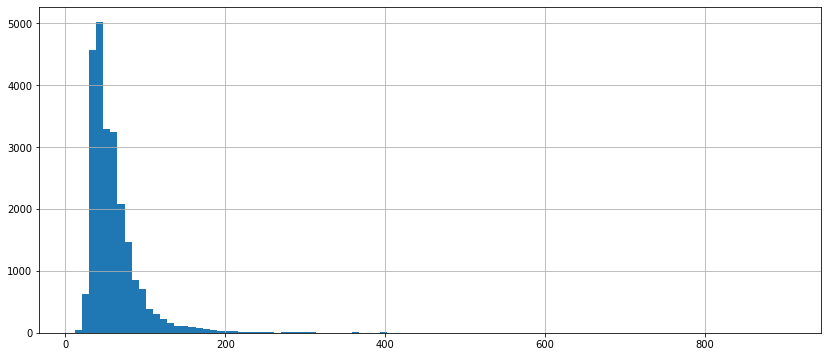

In [49]:
#First step is to make a histogram of total area and to see if it fits into normal distribution.
data.total_area.hist(bins=100, figsize=(14,6))

In [50]:
#Okay, not something that I would have wanted to see. 
#Looks like there is some very small amount of flats with very high area. 
#Let's look at the data using describe method.
data.total_area.describe()

count    23699.000000
mean        60.348651
std         35.654083
min         12.000000
25%         40.000000
50%         52.000000
75%         69.900000
max        900.000000
Name: total_area, dtype: float64

From here I can see that most of flats on the website have area far less than the maximum. The mean value is 60 square meters, and the median is only 52 meters and standart deviation is also pretty high. So as I see it, we can ignore some values for flats with extremely high area for checking the distribution. Let's make a hist that will be showing distribution without this high values.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eb5312690>]],
      dtype=object)

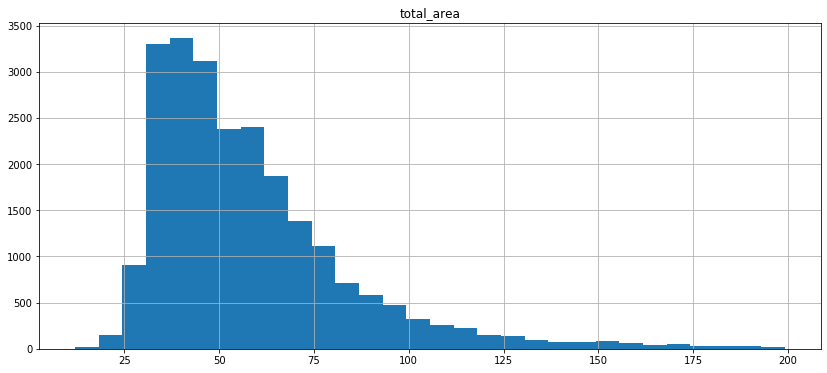

In [51]:
(data
    .query('total_area <200')
    .hist('total_area', bins=30, figsize=(14,6))
)

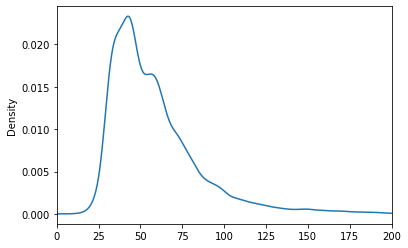

In [52]:
(data
     .query('total_area <200')
     .total_area.plot(y='total_area', kind='density', xlim=(0,200))
)

From here I see that generaly there is a normal distribution here, lots of the flats have area at around 40 square meters, and then amount of adds starts to fall. 

#### Price

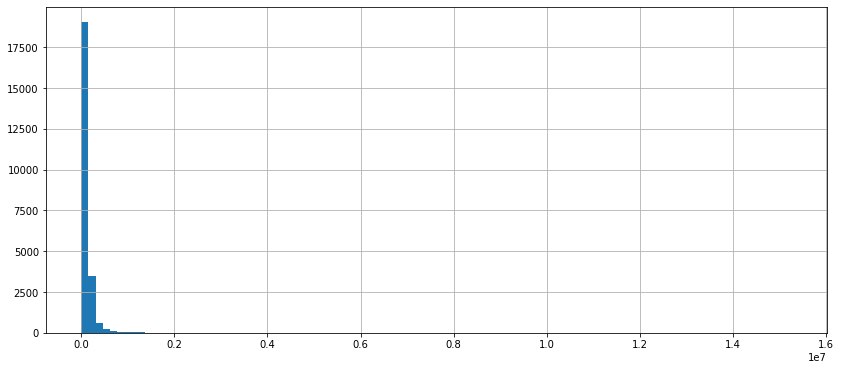

In [53]:
#let's make a histogram for flat prices
data.last_price.hist(bins=100, figsize=(14,6))


In [54]:
#That one is way too odd
data.last_price.describe()

count    2.369900e+04
mean     1.308310e+05
std      2.177403e+05
min      2.440000e+02
25%      6.800000e+04
50%      9.300000e+04
75%      1.360000e+05
max      1.526000e+07
Name: last_price, dtype: float64

All this data is pretty weird, looks like we have here apartments with prices around 200$ and the most expencive appartment is worth more than 15.000.000$. Let's have a look at all of this data without extremely high values. Here we can see that most of the flats have price less that 1.000.000$. So let's look at them.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eb54d3ed0>]],
      dtype=object)

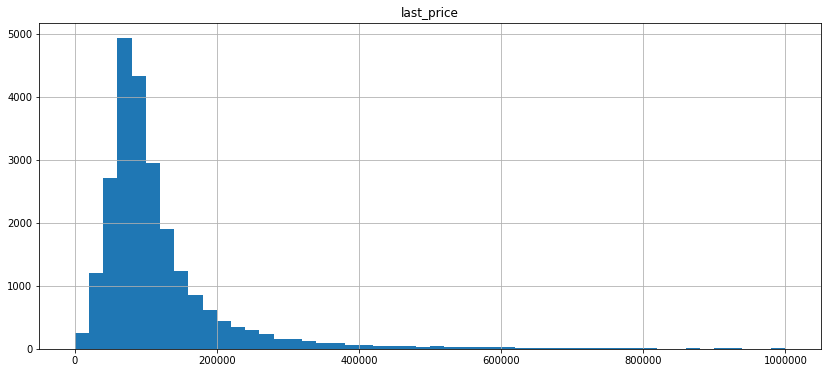

In [55]:
(data
    .query('last_price<1000000')
    .hist('last_price', bins=50, figsize=(14,6))
)    

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eb4c1fe10>]],
      dtype=object)

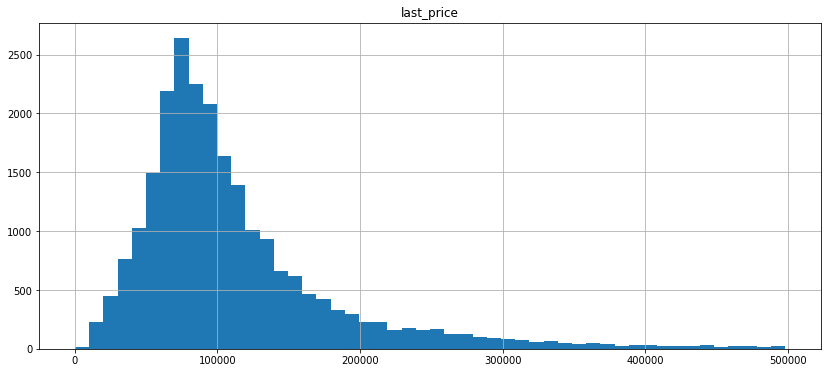

In [56]:
#The most of them are even less than 500.000, so let's better make a histogram for these.
(data
    .query('last_price<500000')
    .hist('last_price', bins=50, figsize=(14,6))
)

This looks a little bit better. From this histogram I can see a normal distribution with a peak around $80.000 and normal decline after that.

Let's drop the rows of data that cost more than 500.000, because they're definetly a rare examples of flats, that would have negative effect on next parts of the research.

In [57]:
data = data.query('last_price<500000')

#### Number of rooms

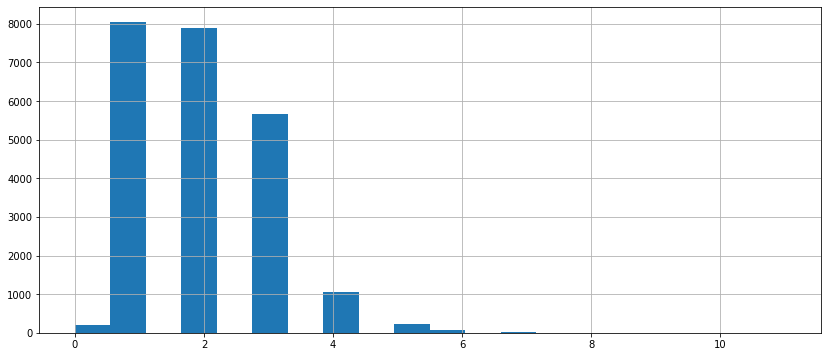

In [58]:
data.bedrooms.hist(bins=20, figsize=(14,6))

In [59]:
data.bedrooms.value_counts()

1     8040
2     7898
3     5653
4     1064
5      239
0      196
6       71
7       30
8        7
9        5
10       2
11       1
Name: bedrooms, dtype: int64

In [60]:
#Here we already have one definite anomaly - 197 flats mith no bedrooms, let's check their value for is_studio
data.query('bedrooms == 0 and is_studio == True or bedrooms ==0 and is_open_plan == True').shape[0]

196

In [61]:
#So I'm right and it's only the flats that are either studios or open plan.
#but let's check if some of studios of open plan flats have more tham 0 bedrooms
data.query('(is_studio == True or is_open_plan == True) and bedrooms != 0').head(5)

,date_posted,days_listed,last_price,bedrooms,total_area,balconies,ceiling_height,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,price_per_m,weekday_posted,month_posted,year_posted,floor_grouped,living_ratio,kitchen_ratio
1379,2015-11-10,231.0,120000.0,1,44.20,1.0,NaN,False,True,Saint Petersburg,10663.0,12738.0,2714.93,1,11,2015,other,0.393665,NaN
2389,2016-06-07,26.0,45000.0,1,25.41,2.0,NaN,True,False,Saint Petersburg,14125.0,12921.0,1770.96,1,6,2016,other,0.672176,NaN
3187,2016-05-17,45.0,76000.0,1,27.00,2.0,NaN,True,False,Saint Petersburg,50348.0,16053.0,2814.81,1,5,2016,other,0.666667,NaN
4180,2016-04-25,62.0,90000.0,1,34.00,2.0,2.80,True,False,Saint Petersburg,23609.0,5299.0,2647.06,0,4,2016,last,0.617647,NaN
5668,2016-04-25,61.0,71000.0,1,36.70,2.0,2.75,False,True,Kudrovo,NaN,0.0,1934.60,0,4,2016,other,0.485014,NaN


In [62]:
#So there definetly are some flats that are studios and have 1 bedroom 
#and open plan flats have even more than 1 bedroom.
#Therefore let's change number of bedrooms in all of the flats with 0 to 1, to make the data more consistent.
data['bedrooms'] = data['bedrooms'].replace(0, 1)

In [63]:
data.bedrooms.value_counts()

1     8236
2     7898
3     5653
4     1064
5      239
6       71
7       30
8        7
9        5
10       2
11       1
Name: bedrooms, dtype: int64

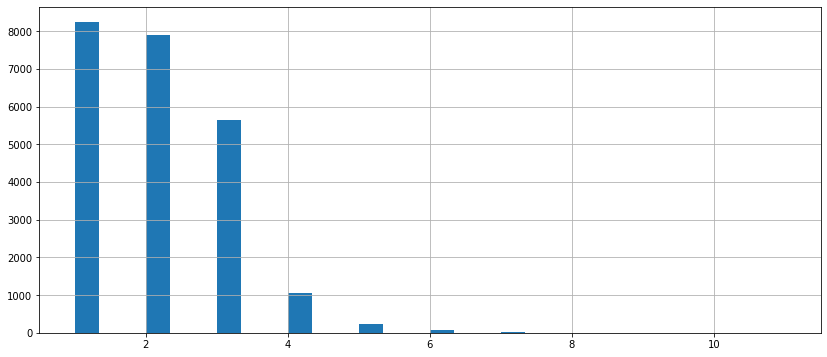

In [64]:
data.bedrooms.hist(bins=30, figsize=(14,6))

Now it seems like we have a here a distribution that looks pretty normal. We have the highest amount of apartments with 1 room, amount of flats with 2 rooms is pretty close, but then it starts to drasticly decline.

#### Ceiling height

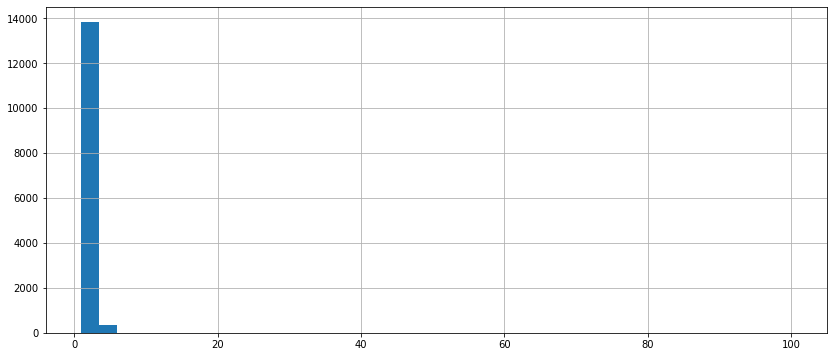

In [65]:
data.ceiling_height.hist(bins=40, figsize=(14,6))

That's very strange, there are some appartments with way to high ceilings.

In [66]:
data.ceiling_height.describe()

count    14172.000000
mean         2.759984
std          1.271385
min          1.000000
25%          2.500000
50%          2.650000
75%          2.800000
max        100.000000
Name: ceiling_height, dtype: float64

Some stuff here is vary wrong. As I see that most of the flats have their ceiling height less than 3 meters. Let's have a look at how many are there with ceiling height more than 5 meters.

In [67]:
data.ceiling_height.max()

100.0

In [68]:
data.query('ceiling_height >=5').ceiling_height.value_counts()

27.0     8
25.0     7
8.0      3
32.0     2
8.3      1
22.6     1
5.8      1
10.3     1
100.0    1
5.3      1
27.5     1
20.0     1
14.0     1
26.0     1
24.0     1
5.0      1
Name: ceiling_height, dtype: int64

In [69]:
#Also there shouldn.t be flats with ceiling lower than 2 meters, let's check those
data.query('ceiling_height < 2').head()

,date_posted,days_listed,last_price,bedrooms,total_area,balconies,ceiling_height,is_studio,is_open_plan,locality_name,airport_dist,city_center_dist,price_per_m,weekday_posted,month_posted,year_posted,floor_grouped,living_ratio,kitchen_ratio
5712,2017-08-14,248.0,30000.0,2,42.8,0.0,1.20,False,False,Mga,NaN,0.0,700.93,0,8,2017,first,0.642523,0.121495
16934,2017-10-17,71.0,82000.0,1,40.0,0.0,1.75,False,False,Saint Petersburg,18732.0,20444.0,2050.00,1,10,2017,other,0.435000,0.208500
22590,2018-10-31,13.0,120000.0,2,55.0,0.0,1.00,False,False,Saint Petersburg,33053.0,14217.0,2181.82,2,10,2018,other,0.589091,0.181818


In [70]:
#I see here some amount of data that was corrupted by mistakes that people have made
#and some data that is just unreliable and unfixible.

#For apartments that have their ceiling height from 20 to 32 meters, i suppose that there was some mistake with
#comma placement, and we can easily fix it.
#100 meters is definetly a human error, so is 14 meters. So let's change them to median value of ceiling height.
#For flats with ceiling height less than 2 meters, also change it to median.
ceiling_height_median = data.ceiling_height.median()
def fix_comma(row):
    #program for fixing strange ceiling heights
    if 20 <= row <= 32:
        return row /10
    elif row == 100 or row > 10 or row <2:
        return ceiling_height_median
    else: return row
    

data['ceiling_height'] = data['ceiling_height'].apply(fix_comma)

In [71]:
(data
     .query('ceiling_height > 5')
     .ceiling_height
     .value_counts()
)

8.0    3
5.8    1
8.3    1
5.3    1
Name: ceiling_height, dtype: int64

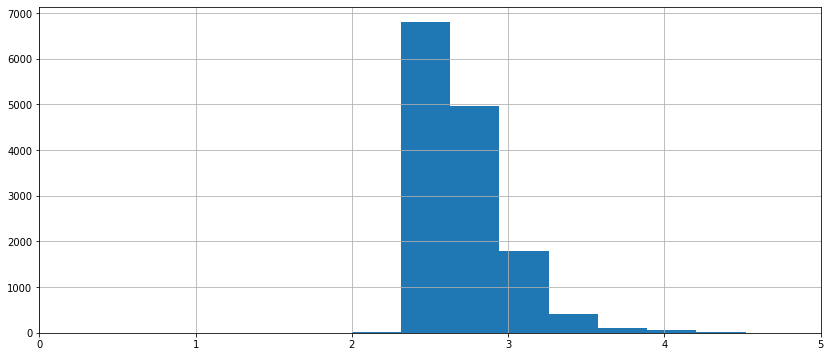

In [72]:
#Let's check the histogram now, but with these values dropped.
plt.xlim(0, 5)
data.ceiling_height.hist(bins=20, figsize=(14,6))

In [73]:
data.ceiling_height.describe()

count    14172.000000
mean         2.715534
std          0.274502
min          2.000000
25%          2.500000
50%          2.650000
75%          2.800000
max          8.300000
Name: ceiling_height, dtype: float64

Now we have here a distribution that is a little closer to normal one. We can see that most of the flats have ceilings within 2,51 and 2,8 meters, and there are really few that go out of there. Standart distribution is about 0.29, which is really low.

### Time to sell apartment

In [74]:
#Accourding to analysis I have conducted earlier, here we can drop rows that have empty value of days listed
#Because they are most likely not sold yet.
data_sold = data[data['days_listed'].notna()]
data_sold.days_listed.describe()

count    20154.000000
mean       178.541233
std        217.075876
min          1.000000
25%         45.000000
50%         94.000000
75%        228.000000
max       1580.000000
Name: days_listed, dtype: float64

In our data there is a huge difference between mean value of days_listed and median value of it, mean is twice as high as median. Let's make a histogram.

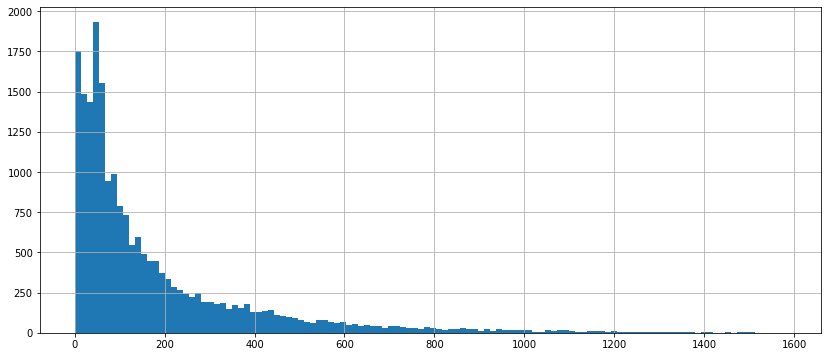

In [75]:
data_sold.days_listed.hist(bins='auto', figsize=(14,6))

So in this data there once again came some strange spread of values. 75% of the appartments were sild for less than a year, but there are lots of others for which it took much more time to get sold. 

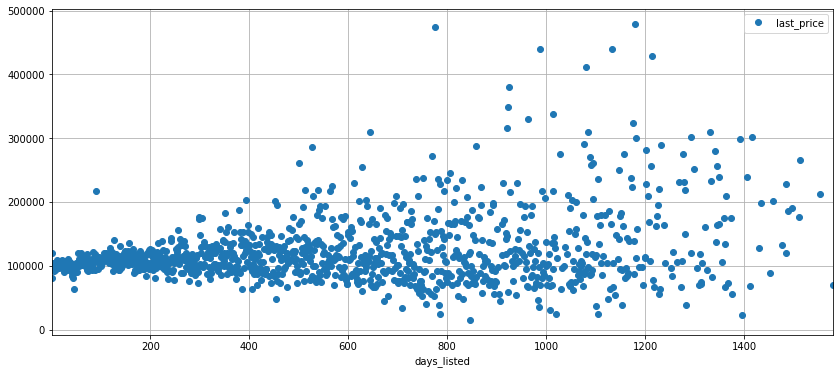

In [76]:
#make a pivot table, that shows if there is any correlation between price of the apartment and time it took to sell it.
(data_sold
         .pivot_table(index='days_listed', values='last_price', aggfunc='mean')
         .plot(y='last_price', grid=True, figsize = (14,6), style='o')
)

This graph shows us that for most of the appatments that have been sold fast, the price is mostly in the same range, but the longer it takes for a flat to be sold the bigger becomes the spread in prices of these apartments. 

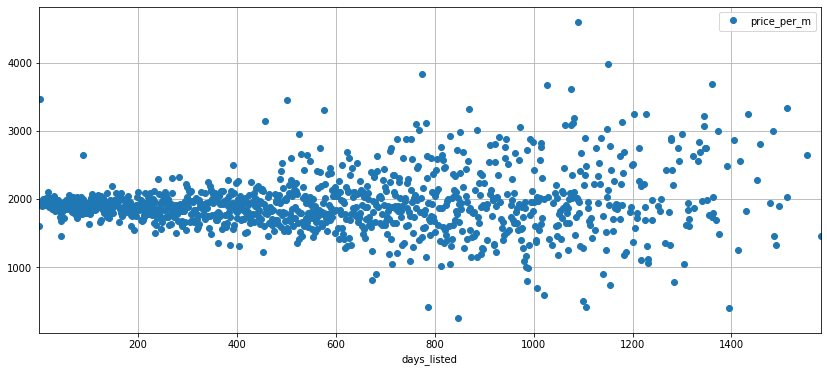

In [77]:
(data_sold
         .pivot_table(index='days_listed', values='price_per_m', aggfunc='mean')
         .plot(y='price_per_m', grid=True, figsize = (14,6), style='o')
)

This correlation stays as we look at how the price per meter changes depending on amount of days it took to sell the appartment. So we can consider the data that we have here to be valueable enough to make conclusions based on data spred.

In [78]:
print('Average time to complete a sale: {:.1f} days.'.format(data_sold.days_listed.mean()))
print('Apartments that can be considered sold rather quickly were sold in less than {:.0f} days'
      .format(data_sold.days_listed.quantile(0.25)))
print ('Apartments that can be considered sold rather slowly were sold in more than {:.0f} days.'
       .format(data_sold.days_listed.quantile(0.8)))

Average time to complete a sale: 178.5 days.
Apartments that can be considered sold rather quickly were sold in less than 45 days
Apartments that can be considered sold rather slowly were sold in more than 284 days.


Generally we can consider the appartments that have stayed on the market for more than 400 days to be outliers. Almost 90% of the apartments have been sold faster than that, and we can see huge that from this point we are beginning to get a much bigger spread in values of apartments' price and price per meter, wich means that all the adds there may have some issues, which has caused them to stay on the market for longer time.

In [79]:
# data_sold.days_listed.hist(bins=100, figsize=(14,6), range=(30,100))

#### Factors affecting appartment price.

In [80]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23206 entries, 0 to 23698
Data columns (total 19 columns):
date_posted         23206 non-null datetime64[ns]
days_listed         20154 non-null float64
last_price          23206 non-null float64
bedrooms            23206 non-null int64
total_area          23206 non-null float64
balconies           23206 non-null float64
ceiling_height      14172 non-null float64
is_studio           23206 non-null bool
is_open_plan        23206 non-null bool
locality_name       23157 non-null object
airport_dist        17681 non-null float64
city_center_dist    23206 non-null float64
price_per_m         23206 non-null float64
weekday_posted      23206 non-null int64
month_posted        23206 non-null int64
year_posted         23206 non-null int64
floor_grouped       23206 non-null object
living_ratio        21364 non-null float64
kitchen_ratio       20983 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(10), int64(4), object(2)
memory usage: 

In [81]:
data['last_price'].describe()

count     23206.000000
mean     111598.850728
std       71878.040697
min         244.000000
25%       68000.000000
50%       92000.000000
75%      131000.000000
max      498000.000000
Name: last_price, dtype: float64

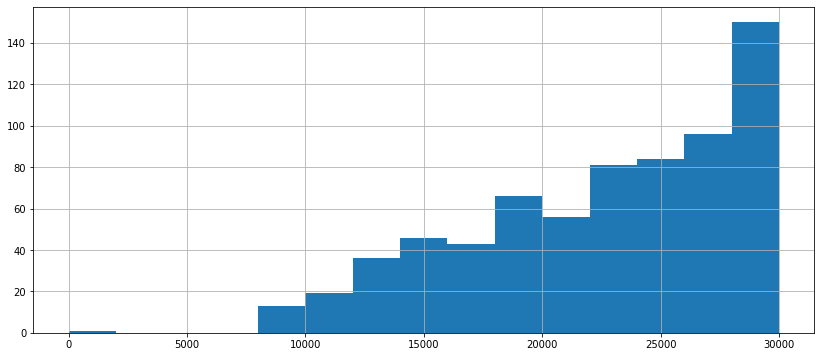

In [82]:
#first thing to do here is to drop values that have price that is too low
data.last_price.hist(bins='auto', figsize = (14,6), range=(0, 30000))

In [83]:
#we should definatly drop row with price of 244$, but for others we can't be so sure,
#because there are some amount of values in this price range, let's leave it all for now.

In [84]:
data_price_corr = data[['last_price', 'bedrooms', 'total_area', 'city_center_dist', 'floor_grouped']]
data_price_corr = data_price_corr.query('city_center_dist != 0')
data_price_corr.head()

,last_price,bedrooms,total_area,city_center_dist,floor_grouped
0,260000.0,3,108.0,16028.0,other
1,67000.0,1,40.4,18603.0,first
2,103920.0,2,56.0,13933.0,other
4,200000.0,2,100.0,8098.0,other
6,74000.0,1,37.3,19143.0,other


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f6eb44dbc90>,
      dtype=object)

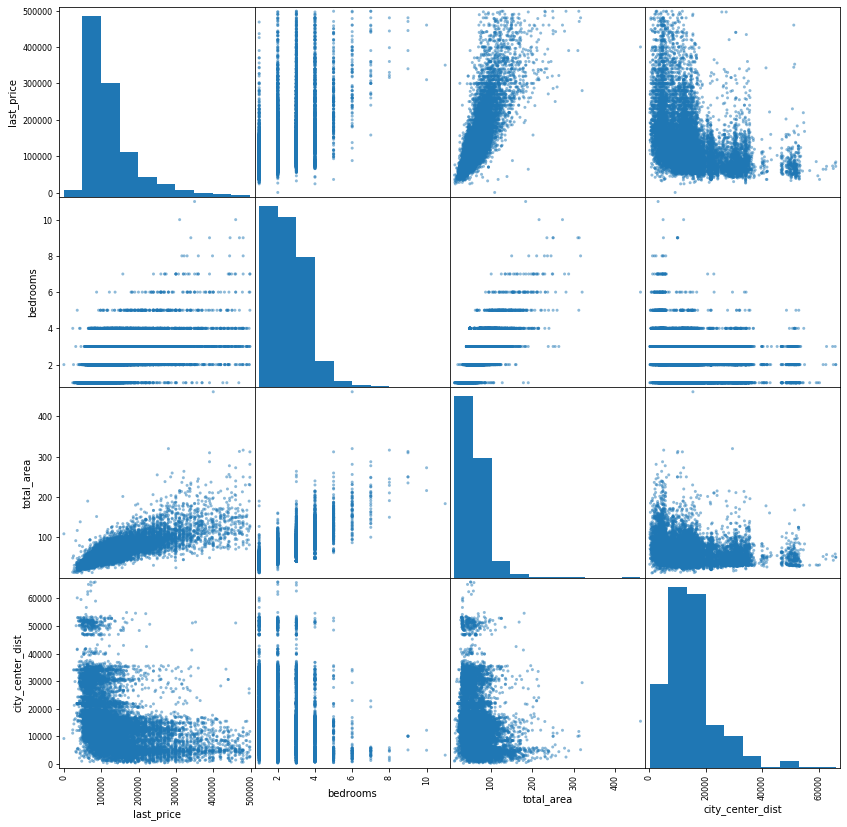

In [85]:
pd.plotting.scatter_matrix(data_price_corr, figsize=(14, 14))

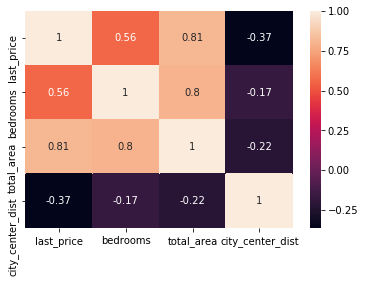

In [86]:
corrMatrix = data_price_corr.corr()
sn.heatmap(corrMatrix, annot=True)

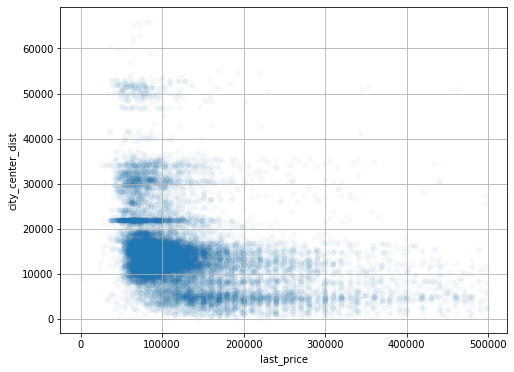

In [87]:
data_price_corr.plot(x='last_price', y='city_center_dist', kind='scatter', 
                    figsize=(8, 6), sharex=False, grid=True, alpha = 0.03)

From this scatter plot and correlation matrix we can make some counclusions:
* There is correlation between total area of the appartment and it's price. As the total area rise, so does the price and correlation coefficient is 0.81, that is pretty high. 
* We can also see that there is correlation of amount of bedrooms. If flat has more bedrooms, it's likely that it would coast more.
* There is a possibility of a negative correlation between price and distance from the city center. As flats get further from city center, they begin to cost less. Let's investigate this one deeper, because it's not so certain.

There is one line here that seems to be our assigned value for apartments in Murino village. But apart from that it looks like there is a negative correlation here. Flats that are closer to the city center seem to have higher price. Flats that are futher than 20 km from center of the city can rarely cost as much as flats that flats in the city center can.

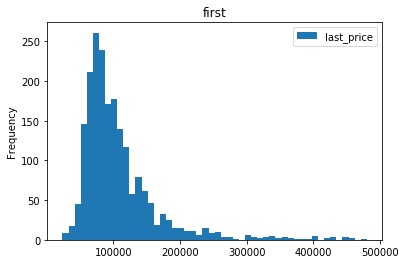

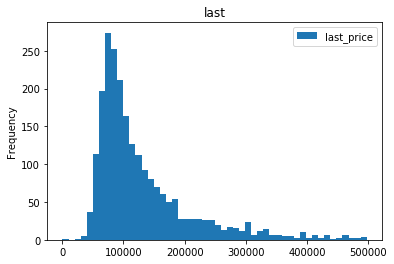

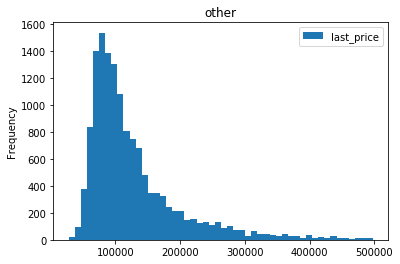

In [88]:
#Let's check if there is any correlation between floor and appartment price.
for floor_grouped, data_price_floor_corr in data_price_corr.groupby('floor_grouped'):
    data_price_floor_corr.plot(y='last_price', title = floor_grouped, kind='hist', bins=50)

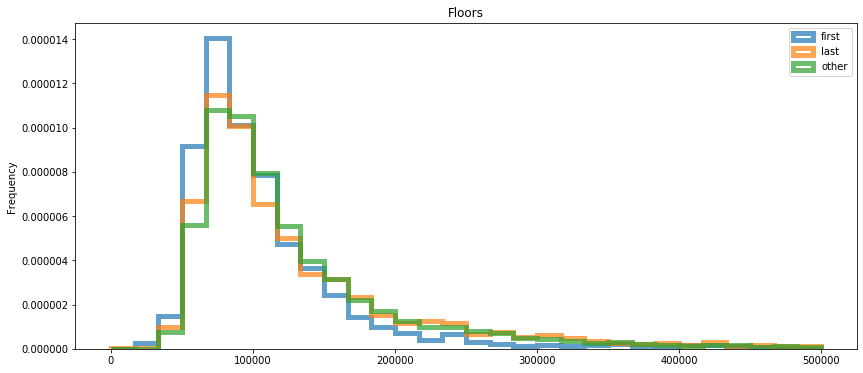

In [91]:
#let's plot them on the same graph, but instead of absolute values I'll use percentages of whole stats.
data_price_corr_first = data_price_corr.query('floor_grouped =="first"')
data_price_corr_last = data_price_corr.query('floor_grouped =="last"')
data_price_corr_other = data_price_corr.query('floor_grouped =="other"')

data_price_corr_first.head()
ax = data_price_corr_first.plot(y='last_price', title = 'Floors', kind='hist',histtype='step', range=(0, 500000), 
                                                            linewidth=5, alpha=0.7, bins=30, label = 'first',
                                figsize=(14, 6), density=1)
data_price_corr_last.plot(y='last_price', title = 'Floors', kind='hist',histtype='step', range=(0, 500000), 
                                                            linewidth=5, alpha=0.7, bins=30, label = 'last', ax=ax, 
                            density=1)
data_price_corr_other.plot(y='last_price', title = 'Floors', kind='hist',histtype='step', range=(0, 500000), 
                                                            linewidth=5, alpha=0.7, bins=30, label = 'other', ax=ax,
                          density=1)

From here we can see that mostly the price has the same distributions despite the floor difference. Appartments that are located on the first floor show slight tendency to have higher percentage of cheaper flats.

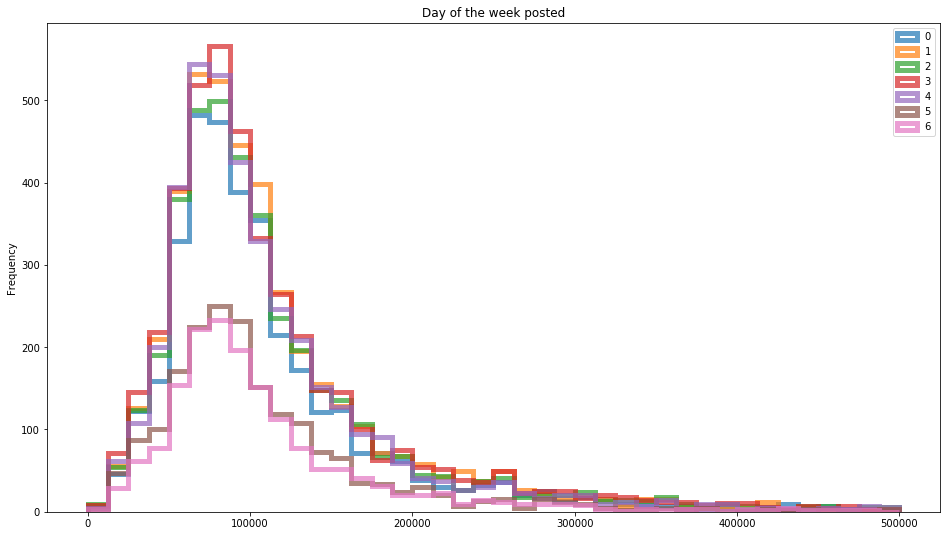

In [92]:
#Next step is to check correlation between day of publication and apartment price.
fig, ax = plt.subplots(figsize=(16,9))
for weekday_posted, data_weekday in data.groupby('weekday_posted'): 
     data_weekday.plot(y='last_price', title = 'Day of the week posted', kind='hist', style='-', histtype='step', range=(0, 500000), 
                                                            linewidth=5, alpha=0.7, bins=40, ax = ax,
                       label = weekday_posted)

<div class="alert alert-block alert-warning">
<b>Remarks: </b> Oops, error. I will not return it for revision as I understand that this is just a minor error that you can easily fix
</div>

From here we can conclude that bigger amount of the apartments have been posted on weekdays, but general price is distributed mostly the same all around the week.

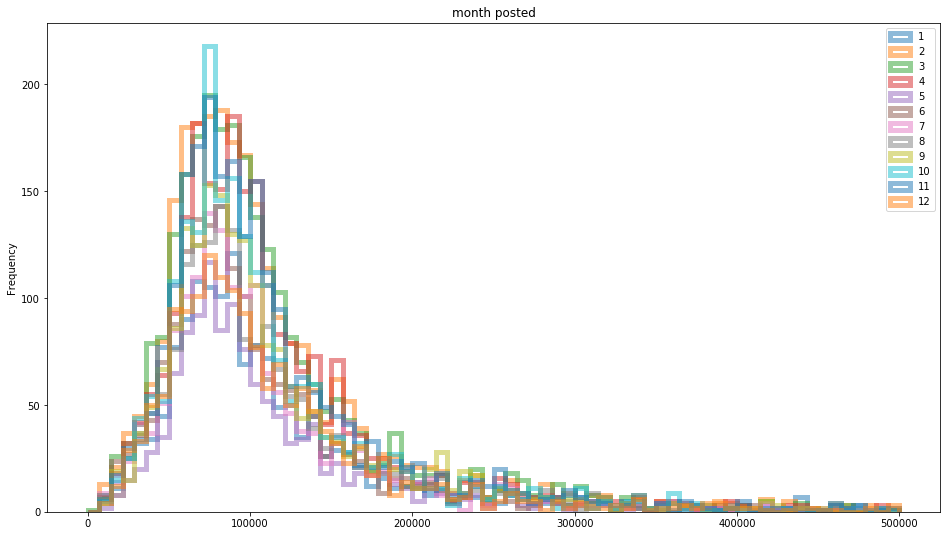

In [93]:
fig, ax = plt.subplots(figsize=(16,9))
for month_posted, data_month in data.groupby('month_posted'): 
     data_month.plot(y='last_price', title = 'month posted', kind='hist', style='-', histtype='step', 
                     range=(0, 500000), linewidth=5, alpha=0.5, bins=70, ax = ax,
                       label = month_posted)

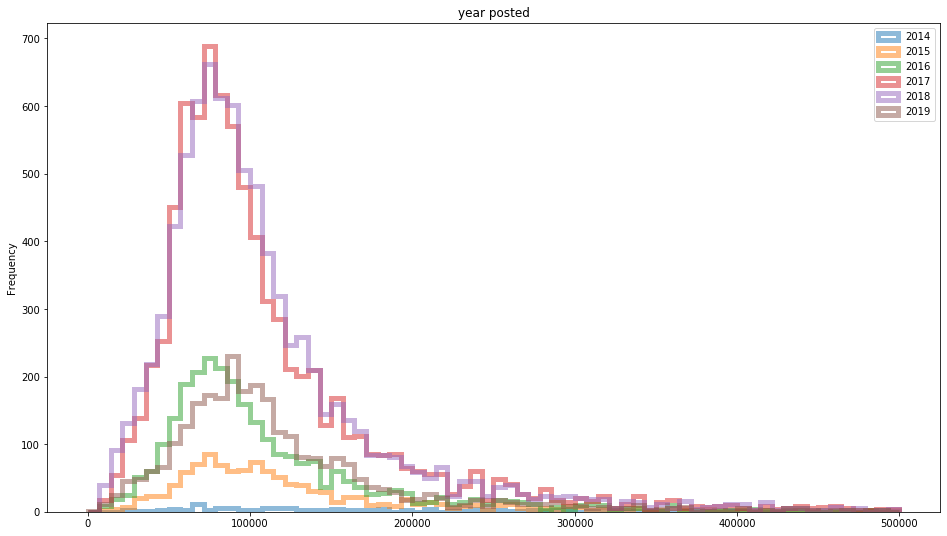

In [94]:
#Same with the month, looks like the price of appartments stays pretty much the same all around the year.
#Check the year
fig, ax = plt.subplots(figsize=(16,9))
for year_posted, data_year in data.groupby('year_posted'): 
     data_year.plot(y='last_price', title = 'year posted', kind='hist', style='-', histtype='step', 
                     range=(0, 500000), linewidth=5, alpha=0.5, bins=70, ax = ax,
                       label = year_posted)

Let's also build separate histograms for years.

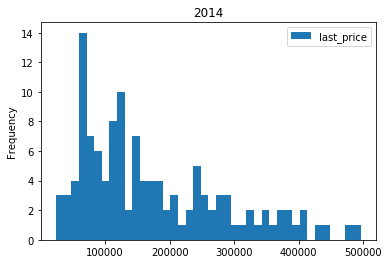

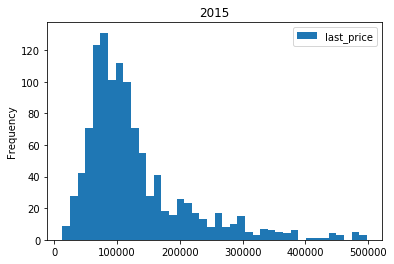

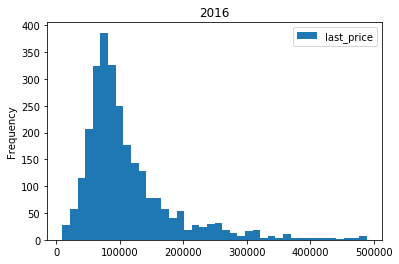

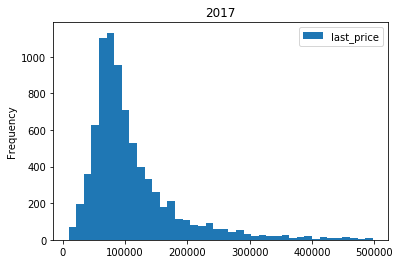

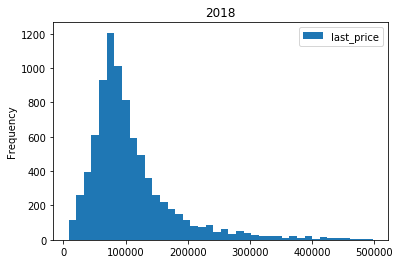

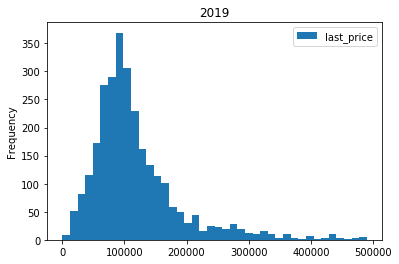

In [92]:
for year_posted, data_year in data.groupby('year_posted'):
     data_year.plot(y='last_price', title = year_posted, kind='hist', bins=40)

Here it is noticible that there have been much less appartments on the website in 2014 and 2015. In 2016 most of the flats have become a bit cheaper, when in 2019 the value of most appartments has increased.

#### Average price per meter in top 10 localities

In [93]:
#Here I will create a pivot table with locality prices and their prices per meter
locality_prices = (data
                   .query('price_per_m >0') #filter out the rows that have had empty area
                   .pivot_table(index = 'locality_name', values = ('price_per_m','last_price'), aggfunc = ['mean', 'count'])
                   .round(2)
)
#Now let's filter out the localities that have had less than 20 adds, sort the table and select only top 10 rows.
locality_prices_top = (locality_prices[locality_prices['count']['price_per_m'] > 20]['mean']
                       .sort_values('price_per_m',ascending=False)
                       .reset_index()
                       .head(10))
locality_prices_top

,locality_name,last_price,price_per_m
0,Zelenogorsk,125766.75,2302.46
1,Saint Petersburg,133214.11,2191.30
2,Pushkin,120080.50,2043.03
3,Sestroretsk,126834.44,2035.15
4,Kudrovo,87173.76,1906.50
5,Pargolovo,89761.50,1803.52
6,Strelna,99690.00,1773.84
7,Murino,73569.24,1721.75
8,Petergof,88476.82,1695.15
9,Pavlovsk,98594.21,1681.34


To my surprise Saint Petersburg turned out not to have the highest average price per square meter. Zelenogorsk seem to have a higher average price per square meter. But highest average price per apartment still goes to Saint Petersburg. 

#### Calculate average price per km distance from city center

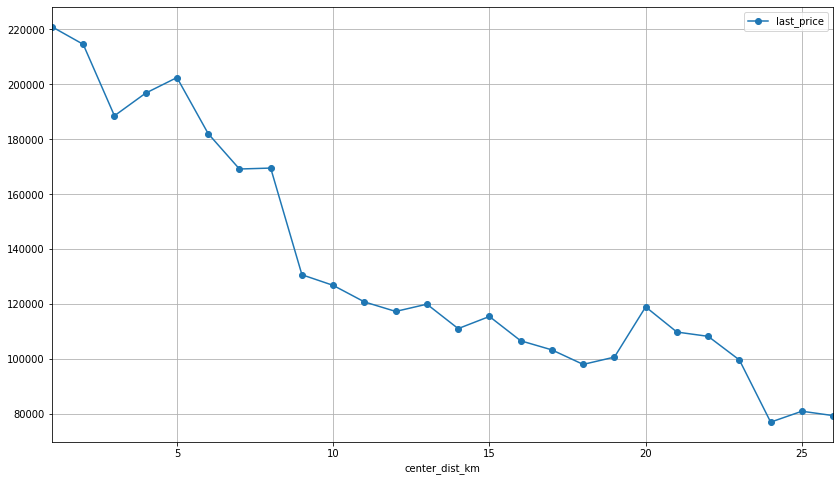

In [98]:
data_spb = data.query('locality_name == "Saint Petersburg"').copy()
data_spb['center_dist_km'] = (data_spb['city_center_dist'] / (1000)).round(0).copy()

price_distance_spb = (data_spb
         .pivot_table(index='center_dist_km', values='last_price', aggfunc=['mean','count']).copy()         
)
#Now let's filter out the distances that have had less than 20 adds and sort the values for us to make a graph.
price_distance_spb_clean = (price_distance_spb[price_distance_spb['count']['last_price'] > 20]['mean']
                            .sort_values('center_dist_km',ascending=False)
                            .reset_index()
                           .copy())
#make a plot
price_distance_spb_clean.plot (x='center_dist_km', y='last_price', figsize=(14, 8), grid=True, style='o-');

From here we can see that there is a deffinite correlation between price of the appartment and it's aproximity to city center. We can consider the border of city center to be around 8 km, because after that there is a fast drop in average price from around 170000 to around 130.000$.

<div class="alert alert-block alert-success">
You are totally right!
</div>


#### Analize appartments in the city center

In [95]:
#create a slice for apartments that are located no more than in 8 km from city center.
data_center = data_spb.query('center_dist_km <= 8')
data_center.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3699 entries, 4 to 23694
Data columns (total 20 columns):
date_posted         3699 non-null datetime64[ns]
days_listed         3140 non-null float64
last_price          3699 non-null float64
bedrooms            3699 non-null int64
total_area          3699 non-null float64
balconies           3699 non-null float64
ceiling_height      2398 non-null float64
is_studio           3699 non-null bool
is_open_plan        3699 non-null bool
locality_name       3699 non-null object
airport_dist        3697 non-null float64
city_center_dist    3699 non-null float64
price_per_m         3699 non-null float64
weekday_posted      3699 non-null int64
month_posted        3699 non-null int64
year_posted         3699 non-null int64
floor_grouped       3699 non-null object
living_ratio        3412 non-null float64
kitchen_ratio       3354 non-null float64
center_dist_km      3699 non-null float64
dtypes: bool(2), datetime64[ns](1), float64(11), int64(4), ob

In [96]:
#create a slice that has only area, ceiling height and amount of bedrooms to find correlaions between them.
data_center_details = data_center[['total_area', 'ceiling_height', 'bedrooms' ]]
data_center_details.describe()

,total_area,ceiling_height,bedrooms
count,3699.000000,2398.000000,3699.000000
mean,78.561257,3.030104,2.599892
std,36.394629,0.351076,1.229245
min,12.000000,2.000000,1.000000
25%,52.000000,2.770000,2.000000
50%,72.000000,3.000000,2.000000
75%,96.000000,3.200000,3.000000
max,316.300000,5.800000,11.000000


array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cd28c6c50>,
      dtype=object)

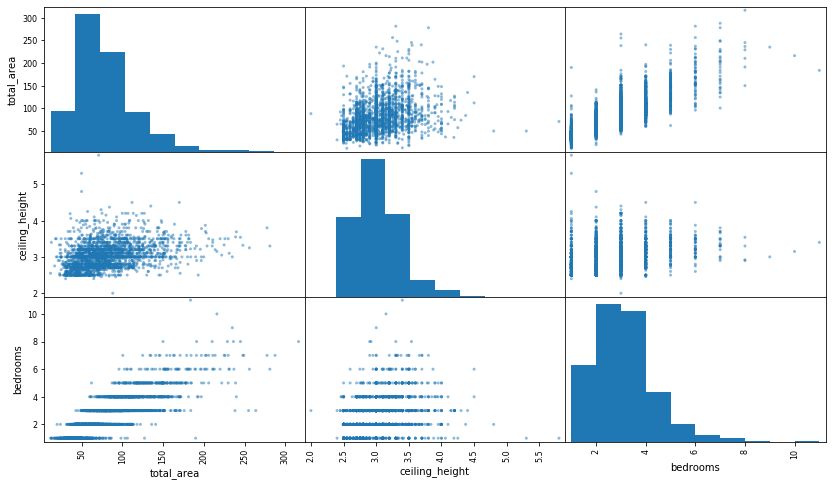

In [97]:
pd.plotting.scatter_matrix(data_center_details, figsize=(14, 8))

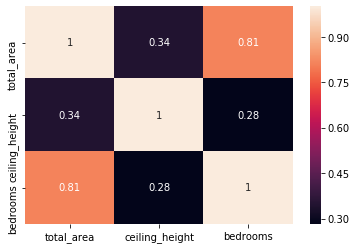

In [98]:
corrMatrix = data_center_details.corr()
sn.heatmap(corrMatrix, annot=True)

Looks like the only correlation that is here is between total area and amount of bedrooms, which is pretty obvious: the more bedrooms there are, higher the area and vice versa.

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7f4cd8246490>,
      dtype=object)

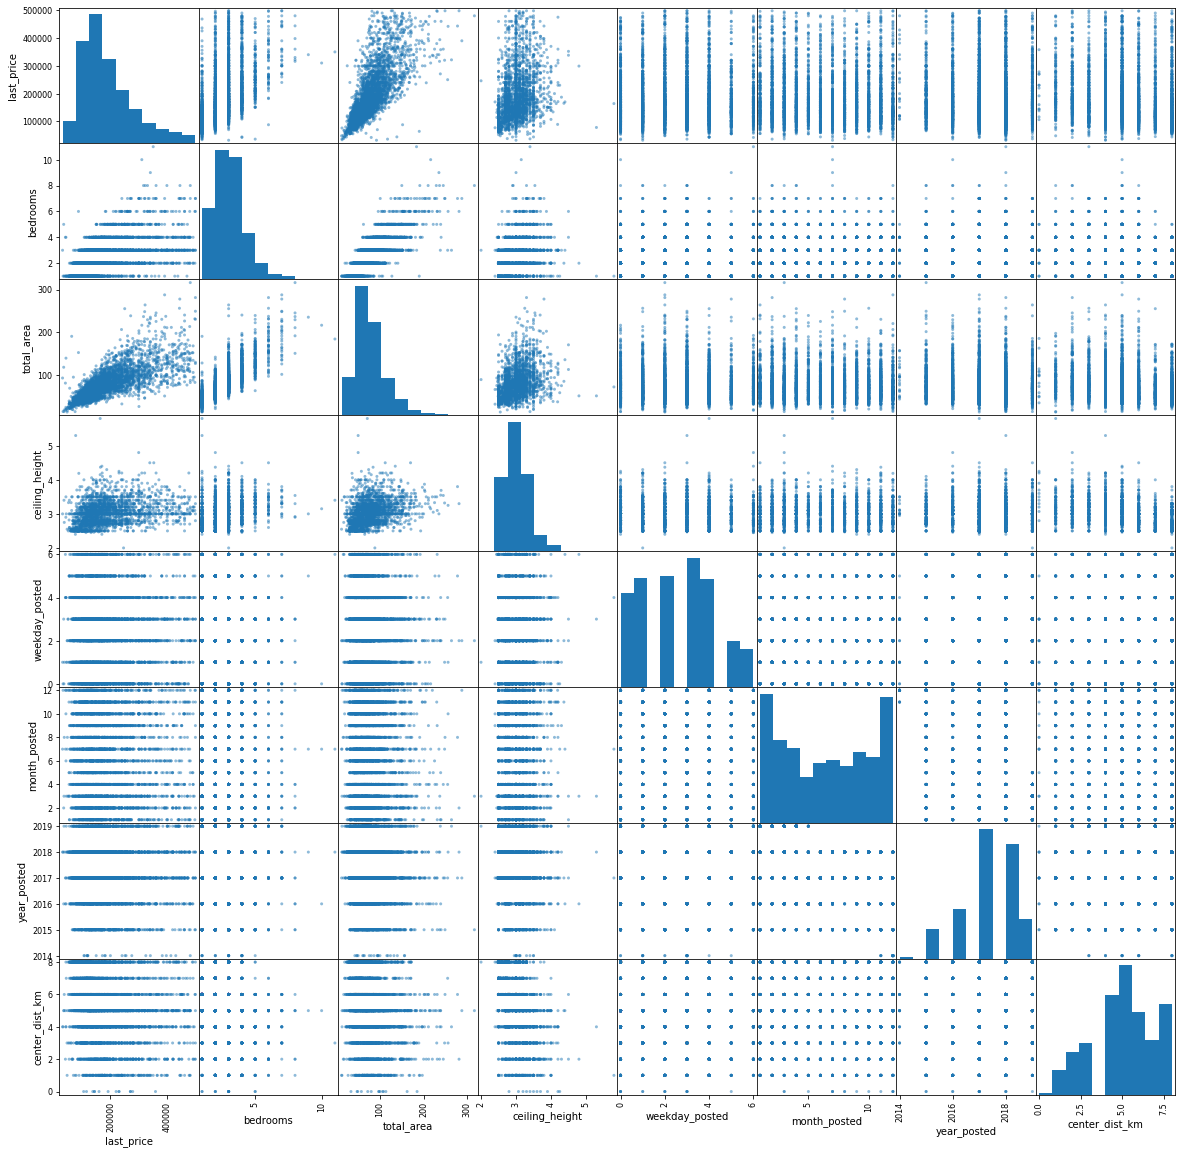

In [99]:
#next step is to look at correlations between remaining values
data_center_extract = data_center[['last_price','bedrooms', 'total_area','ceiling_height','weekday_posted',
                                  'month_posted', 'year_posted','center_dist_km']]
pd.plotting.scatter_matrix(data_center_extract, figsize=(20, 20))

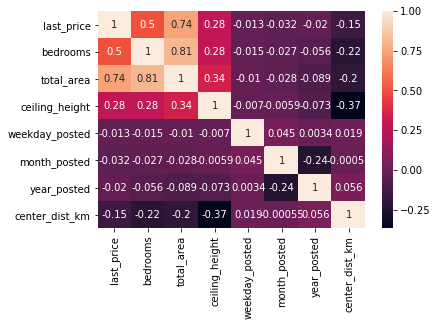

In [100]:
corrMatrix = data_center_extract.corr()
sn.heatmap(corrMatrix, annot=True)

From this analysis of prices in city center I can see that lots of things lose their imporance. There is completely no correlation between price and date of publication, there is no correlation between distance to the city center: if the appartment is in downtown area it doesn't matter if it's located 1 km away from actual center or 7, the cost will remain the same. While for the rest of the data we have seen a negative correlation between these values - as flats got further from city center area, they started to cost less.  

### Step 5. Overall conclusion

By analysing this data I have discovered some interesting patterns, that weren't obvious at first:
* Most of the flats have price lower than 500.000 (that wouldn't have been true for Tel-Aviv);
* Almost 50% of the flats were sold within 3 month time;
* The factors that have the highest indluence on the price are - its total area, amount of bedrooms and proximity to cith center;
* There is no definite correlation between time of publication and final price of the apartments. The flats are sold at mostly the same price throughout the year;
* The downtown area radius is around 8 kilometers;
* In the downtown area of St. Petersburg there is almost no correlation between proximity to exact center, appartment cost is roughly the same.

<div class="alert alert-block alert-success">

You've done such a great job. Glad to say that your project  has been accepted.You've mastered it!
    
### Code

Everything is fine. That is very pleased - met project structure, the steps of the job identified and executed sequentially, the code is written carefully, use code comments, you can quickly understand which operation to perform complex design, variable names convey the meaning of the operations. 

### Conclusions

You are very good at analyzing complex data, making correct hypotheses, and checking your conclusions for the possibility of matching reality. You can see a deep understanding of the essence of the analysis. It was very interesting to check your project and follow your thought, keep it up! 
</div>


### Project completion checklist

Mark the completed tasks with 'x'. Then press Shift+Enter.

- [x]  file opened
- [x]  files explored (first rows printed, info() method)
- [X]  missing values determined
- [X]  missing values filled in
- [X]  clarification of the discovered missing values provided
- [X]  data types converted
- [X]  explanation of which columns had the data types changed and why
- [X]  calculated and added to the table: the price per square meter
- [X]  calculated and added to the table: the day of the week, month, and year that the ad was published
- [X]  calculated and added to the table: which floor the apartment is on (first, last, or other)
- [X]  calculated and added to the table: the ratio between the living space and the total area, as well as between the kitchen space and the total area
- [X]  the following parameters investigated: square area, price, number of rooms, and ceiling height
- [X]  histograms for each parameter created
- [X]  task completed: "Examine the time it's taken to sell the apartment and create a histogram. Calculate the mean and median and explain the average time it usually takes to complete a sale. When can a sale be considered extra quick or taken an extra slow?"
- [X]  task completed: "Remove rare and outlying values and describe the specific details you've discovered."
- [X]  task completed: "Which factors have had the biggest influence on an apartment’s value? Examine whether the value depends on price per meter, number of rooms, floor (top or bottom), or the proximity to the downtown area. Also study the correlation to the ad posting date: day of the week, month, and year. "Select the 10 places with the largest number of ads and then calculate the average price per square meter in these localities. Select the locations with the highest and lowest housing prices. You can find this data by name in the ’*locality_name’* column. "
- [X]  task completed: "Thoroughly look at apartment offers: each apartment has information about the distance to the downtown area. Select apartments in Saint Petersburg (*‘locality_name’*). Your task is to pinpoint which area is considered to be downtown. Create a column with the distance to the downtown area in km and round to the nearest whole number. Next, calculate the average price for each kilometer. Build a graph to display how prices are affected by the distance to the downtown area. Define the turning point where the graph significantly changes. This will indicate downtown. "
- [X]  task completed: "Select a segment of apartments in the downtown. Analyze this area and examine the following parameters: square area, price, number of rooms, ceiling height. Also identify the factors that affect an apartment’s price (number of rooms, floor, distance to the downtown area, and ad publication date). Draw your conclusions. Are they different from the overall conclusions about the entire city?"
- [X]  each stage has a conclusion
- [X]  overall conclusion drawn